In [1]:
import torch
import matplotlib.pyplot as plt
from predict import predict_distmap

from ConvNet import ConvNet

In [2]:
model = ConvNet()
sd = torch.load('../../steps/convnet_results/model.pth',  map_location=torch.device('cpu'))
model.load_state_dict(sd['model'])

<All keys matched successfully>

In [3]:
a = predict_distmap(model, '16pkA01')

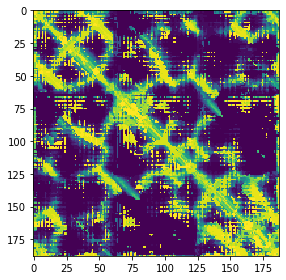

In [11]:
plt.imshow(a, cmap='viridis_r');
plt.savefig('../../plots/16pkpredicted.png', dpi=100)
plt.tight_layout()

In [8]:
y = torch.load('../../data/our_input/distance_maps/distance_maps32/16pkA01.pt')

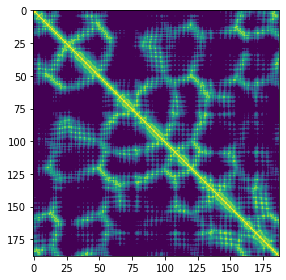

In [12]:
plt.imshow(y, cmap='viridis_r')
plt.savefig('../../plots/16pkreal.png', dpi=100)
plt.tight_layout();

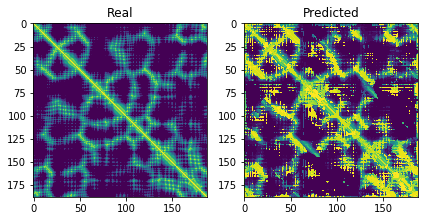

In [17]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(y, cmap='viridis_r')
ax[0].set_title('Real')
ax[1].imshow(a, cmap='viridis_r')
ax[1].set_title('Predicted')

plt.tight_layout()

plt.savefig('../../plots/16pk_real_predicted.png', dpi=100);